<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> Montage is an astronomical image toolkit with components for reprojection, background matching, coaddition and visualization of FITS files. It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.

The Montage source is written in ANSI-C and code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ). The Python package can be installed from PyPI ("</i>pip install MontagePy<i>"). The package has no external dependencies. See http://montage.ipac.caltech.edu/ for details on the design and applications of Montage.


# MontagePy.main modules: mOverlaps

The Montage modules are generally used as steps in a workflow to create a mosaic of a set of input images.  These steps are: determine the geometry of the mosaic on the sky, reproject the images to a common frame and spatial sampling; rectify the backgrounds to a common level, and coadd the images into a mosaic.  This page illustrates the use of one Montage module, mOverlaps, which is used to determine the set of overlap areas for a collection of images.

Visit <a href="Mosaic.ipynb">Building a Mosaic with Montage</a> to see how mOverlaps is used as part of a workflow to creage a mosaic (or the <a href="Mosaic_oneshot.ipynb"> one shot </a> version if you just want to see the commands).  See the complete list of Montage Notebooks <a href="http://montage.ipac.caltech.edu/MontageNotebooks">here</a>.


In [5]:
from MontagePy.main import mOverlaps, mViewer

help(mOverlaps)

Help on built-in function mOverlaps in module MontagePy.main:

mOverlaps(...)
    mOverlaps takes a list of images (with WCS/corner information) and generates a list of image overlaps.
    
    Parameters
    ----------
    tblfile : str
        Image metadata file.
    difftbl : str
        Output table of overlap areas.
    quickmode : bool, optional
        Use faster but fairly accurate overlap check rather than full geometry calculation.
    debug : int, optional
        Debugging output level.
    
    
    Returns
    -------
    status : int
        Return status (0: OK, 1:ERROR).
    msg : str
        Return message (for errors).
    count : int
        Number of overlaps.



## mOverlaps Example

In a test region near M17 we have 48 J-band images. Here we use mOverlaps to determine which of these overlap and by how much.

In [6]:
rtn = mOverlaps("M17/pimages.tbl", "work/M17/diffs.tbl")

print(rtn)

{'status': '0', 'count': 128}


&nbsp;<p/>
Here is the output

In [7]:
import os
import numpy as np
import pandas as pd
from astropy.io import ascii

ipactable = ascii.read('work/M17/diffs.tbl').to_pandas()

ipactable

cntr1  cntr2                                    plus  \
0        0      8  hdu0_2mass-atlas-990502s-j1330068.fits   
1        0      9  hdu0_2mass-atlas-990502s-j1330068.fits   
2        0     13  hdu0_2mass-atlas-990502s-j1330068.fits   
3        0     14  hdu0_2mass-atlas-990502s-j1330068.fits   
4        0     21  hdu0_2mass-atlas-990502s-j1330068.fits   
5        0     24  hdu0_2mass-atlas-990502s-j1330068.fits   
6        0     29  hdu0_2mass-atlas-990502s-j1330068.fits   
7        0     31  hdu0_2mass-atlas-990502s-j1330068.fits   
8        1      6  hdu0_2mass-atlas-990502s-j1430080.fits   
9        1     11  hdu0_2mass-atlas-990502s-j1430080.fits   
10       1     20  hdu0_2mass-atlas-990502s-j1430080.fits   
11       1     27  hdu0_2mass-atlas-990502s-j1430080.fits   
12       1     34  hdu0_2mass-atlas-990502s-j1430080.fits   
13       1     41  hdu0_2mass-atlas-990502s-j1430080.fits   
14       2      5  hdu0_2mass-atlas-990502s-j1450068.fits   
15       2      6  hdu0_2mass-atlas-990502s-j1450068.fits   
16       2     18  hdu0_2mass-atlas-990502s-j1450068.fits   
17       2     25  hdu0_2mass-atlas-990502s-j1450068.fits   
18       2     26  hdu0_2mass-atlas-990502s-j1450068.fits   
19       2     28  hdu0_2mass-atlas-990502s-j1450068.fits   
20       3     11  hdu0_2mass-atlas-990502s-j1350080.fits   
21       3     13  hdu0_2mass-atlas-990502s-j1350080.fits   
22       3     17  hdu0_2mass-atlas-990502s-j1350080.fits   
23       3     23  hdu0_2mass-atlas-990502s-j1350080.fits   
24       3     38  hdu0_2mass-atlas-990502s-j1350080.fits   
25       3     41  hdu0_2mass-atlas-990502s-j1350080.fits   
26       4     15  hdu0_2mass-atlas-990502s-j1460186.fits   
27       4     18  hdu0_2mass-atlas-990502s-j1460186.fits   
28       4     19  hdu0_2mass-atlas-990502s-j1460186.fits   
29       4     26  hdu0_2mass-atlas-990502s-j1460186.fits   
..     ...    ...                                     ...   
98      25     37  hdu0_2mass-atlas-990502s-j1460209.fits   
99      26     37  hdu0_2mass-atlas-990502s-j1460198.fits   
100     26     42  hdu0_2mass-atlas-990502s-j1460198.fits   
101     27     33  hdu0_2mass-atlas-990502s-j1430092.fits   
102     27     34  hdu0_2mass-atlas-990502s-j1430092.fits   
103     27     35  hdu0_2mass-atlas-990502s-j1430092.fits   
104     27     41  hdu0_2mass-atlas-990502s-j1430092.fits   
105     27     43  hdu0_2mass-atlas-990502s-j1430092.fits   
106     29     30  hdu0_2mass-atlas-001012s-j0140198.fits   
107     29     31  hdu0_2mass-atlas-001012s-j0140198.fits   
108     30     44  hdu0_2mass-atlas-990502s-j1320186.fits   
109     30     45  hdu0_2mass-atlas-990502s-j1320186.fits   
110     32     35  hdu0_2mass-atlas-990502s-j1350103.fits   
111     32     36  hdu0_2mass-atlas-990502s-j1350103.fits   
112     33     35  hdu0_2mass-atlas-990502s-j1430103.fits   
113     33     43  hdu0_2mass-atlas-990502s-j1430103.fits   
114     34     43  hdu0_2mass-atlas-990502s-j1440186.fits   
115     34     47  hdu0_2mass-atlas-990502s-j1440186.fits   
116     35     41  hdu0_2mass-atlas-990502s-j1420174.fits   
117     36     38  hdu0_2mass-atlas-990502s-j1340174.fits   
118     36     39  hdu0_2mass-atlas-990502s-j1340174.fits   
119     36     45  hdu0_2mass-atlas-990502s-j1340174.fits   
120     37     42  hdu0_2mass-atlas-990502s-j1470068.fits   
121     38     45  hdu0_2mass-atlas-990502s-j1340186.fits   
122     39     44  hdu0_2mass-atlas-990502s-j1330103.fits   
123     39     45  hdu0_2mass-atlas-990502s-j1330103.fits   
124     40     43  hdu0_2mass-atlas-990502s-j1450103.fits   
125     40     47  hdu0_2mass-atlas-990502s-j1450103.fits   
126     43     47  hdu0_2mass-atlas-990502s-j1440174.fits   
127     44     45  hdu0_2mass-atlas-990502s-j1320174.fits   

                                      minus                     diff  
0    hdu0_2mass-atlas-990502s-j1320209.fits  diff.000000.000008.fits  
1    hdu0_2mass-atlas-990502s-j1320198.fits  diff.000000.000009.fits  
2    hdu0

and here is a coverage map illustrating the overlaps:

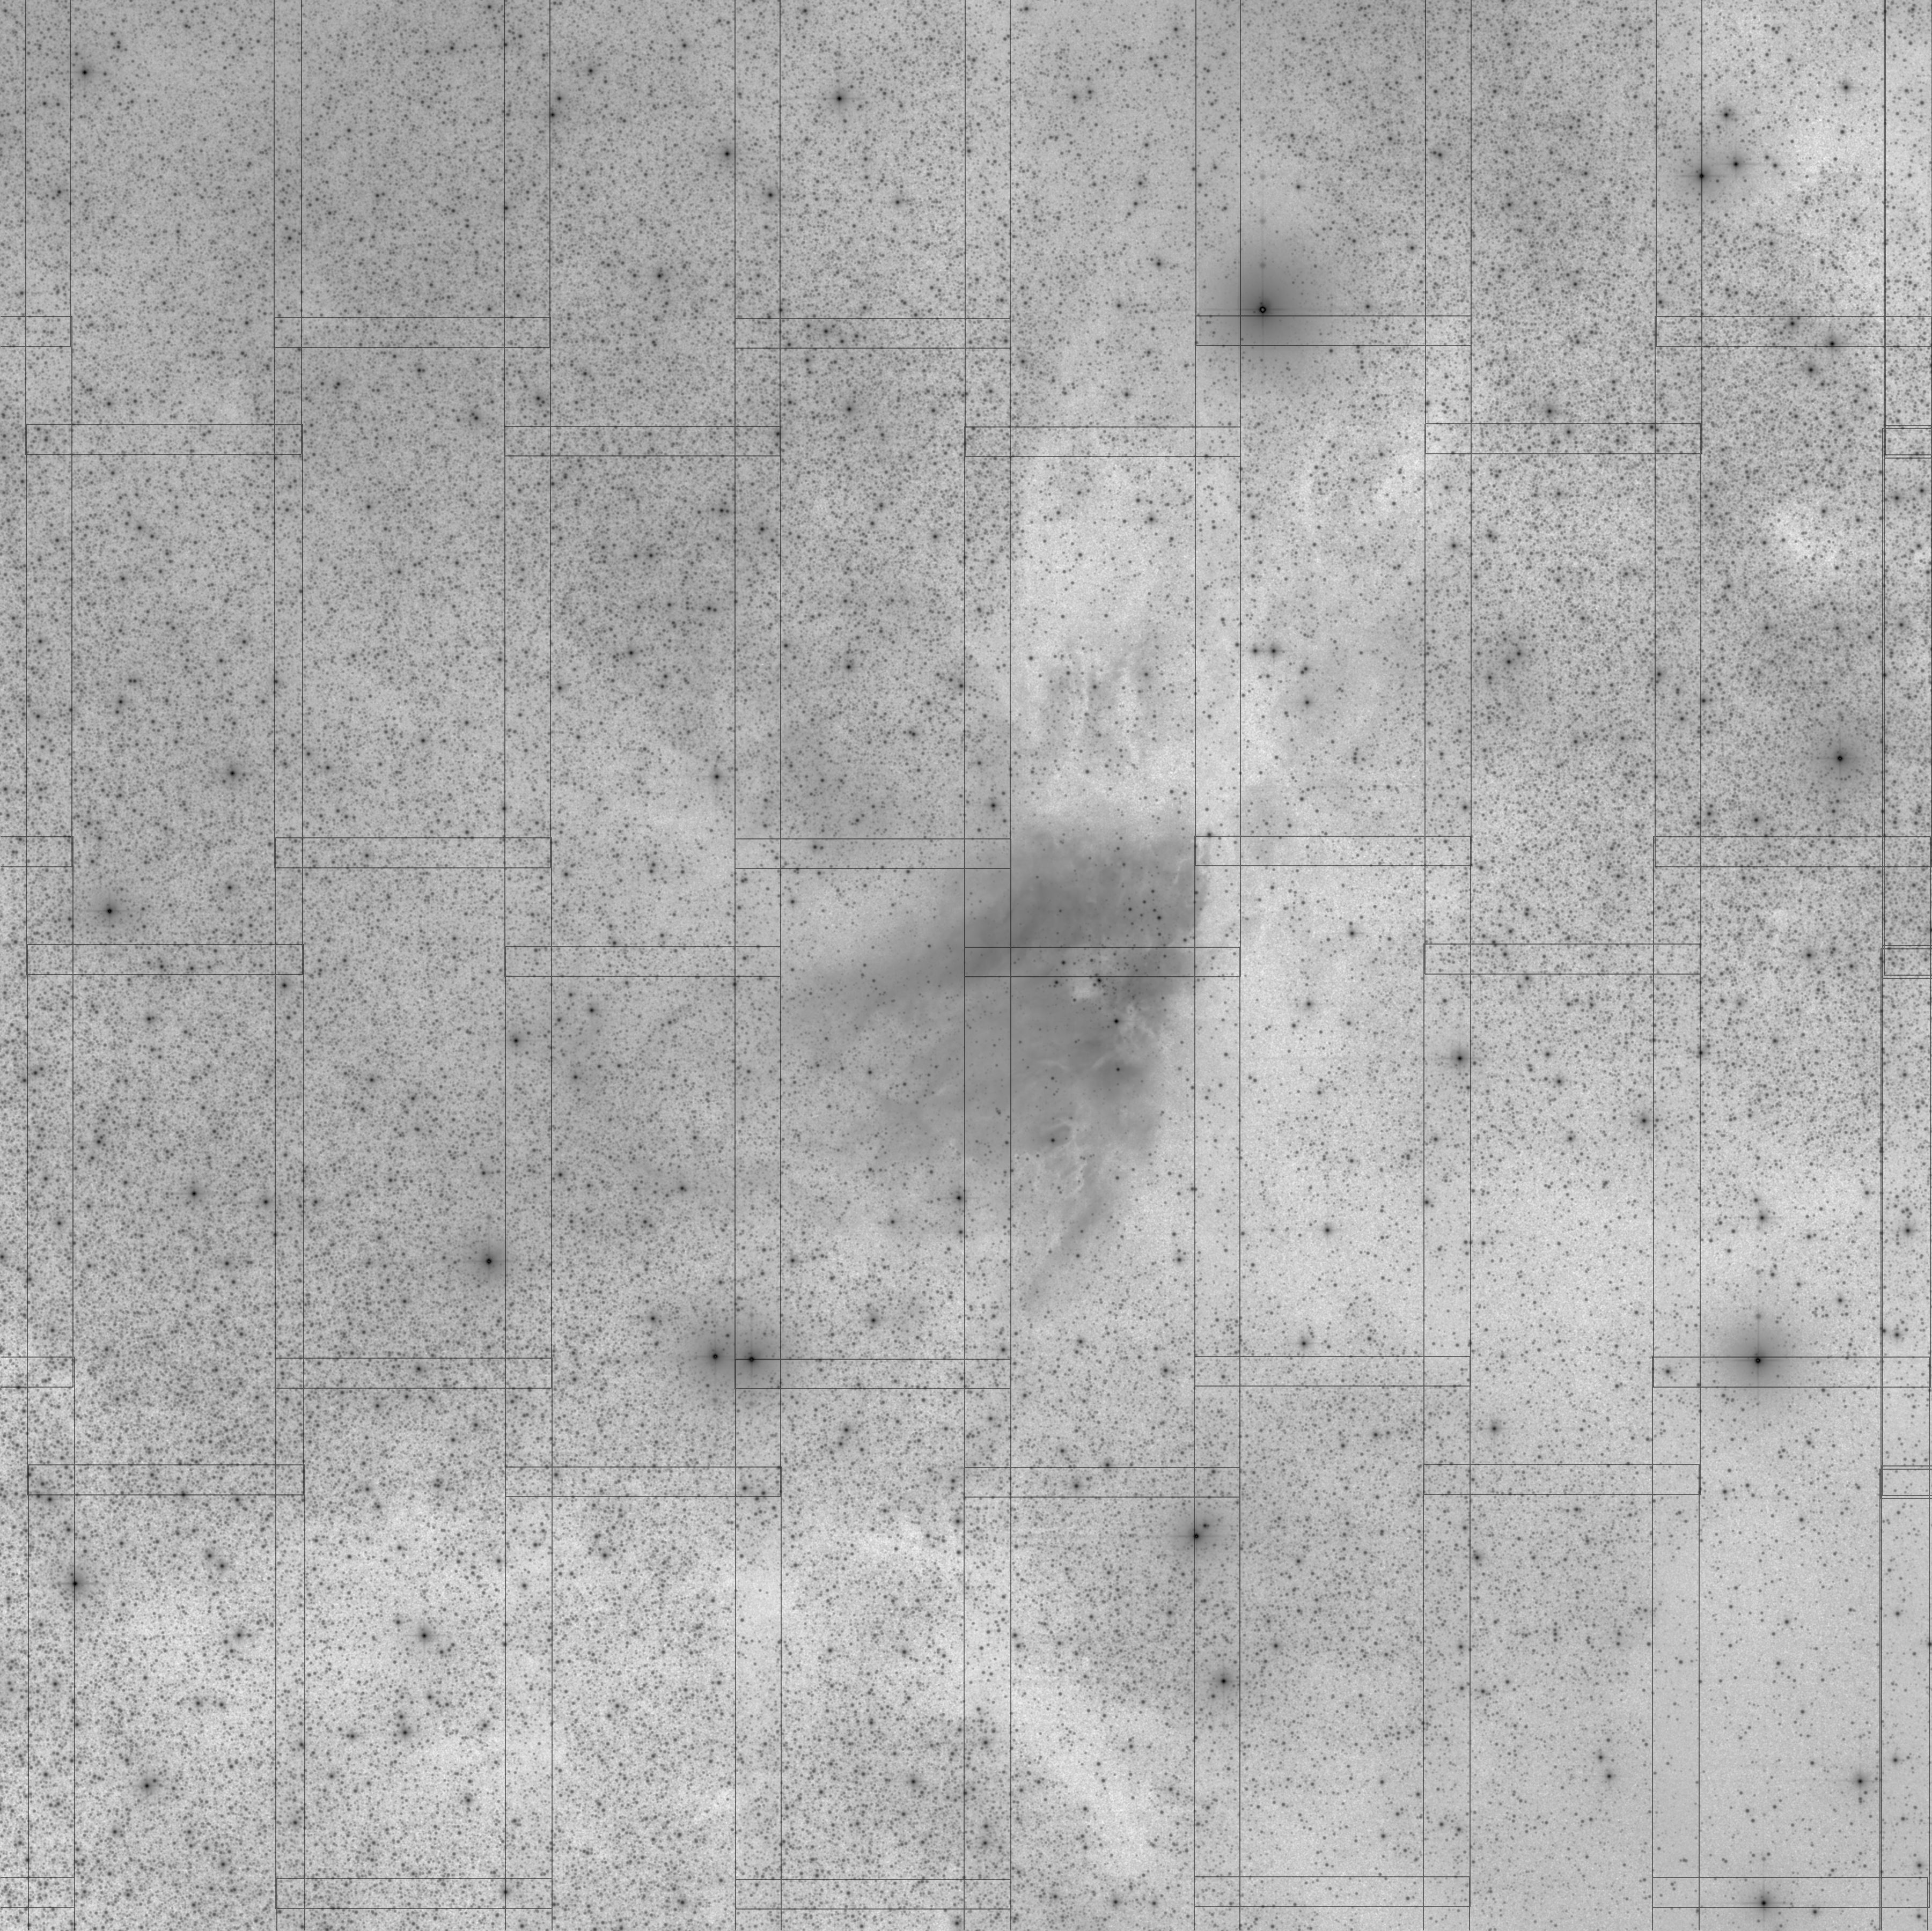

In [8]:
from IPython.display import Image

rtn = mViewer("-color black -imginfo M17/pimages.tbl \
               -ct 1 -gray M17/mosaic.fits -2s max gaussian-log \
               -out work/M17/mosaic.png",
              "", mode=2)

Image(filename='work/M17/mosaic.png')

&nbsp;<p/>

## Error Handling

If mDiff encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user specifies a table that doesn't exist: 

In [9]:
rtn = mOverlaps("M17/unknown.tbl", "work/M17/diffs.tbl")

print(rtn)

{'status': '1', 'msg': b'Invalid image metadata file: M17/unknown.tbl'}


&nbsp;

## Classic Montage: mOverlaps as a Stand-Alone Program

### mOverlaps Unix/Windows Command-line Arguments

<p>mOverlaps can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mOverlaps [-e] [-d level] [-s statusfile] images.tbl diffs.tbl
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mOverlaps can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mOverlaps                                                            */
/*                                                                       */
/*  Given a list of images, determines which ones overlap.  This program */
/*  assumes that the images are relatively small (i.e. not all-sky) and  */
/*  determines if there is overlap by going around the outside of each   */
/*  to see if any of the edge pixels are inside the other.               */
/*                                                                       */
/*   char  *tblfile        Image metadata file                           */
/*   char  *difftbl        Output table of overlap areas                 */
/*                                                                       */
/*   int    quickmode      Use faster but fairly accurate overlap check  */
/*                         rather than full geometry calculation         */
/*                                                                       */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*************************************************************************/

struct mOverlapsReturn *mOverlaps(char *tblfile, char *difftbl, int quickmode, int debug)
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mOverlapsReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg [1024];    // Return message (for error return)
   char   json[4096];    // Return parameters as JSON string
   int    count;         // Number of overlaps.
};
</pre>